# Text classificaton 📋📋

## 1. Import libraries

In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

## 2. Constants

In [48]:
COUNTRY = "country"
DESCRIPTION = "description"
DESIGNATION = "designation"
POINTS = "points"
PRICE = "price"
PROVINCE = "province"
REGION_1 = "region_1"
REGION_2 = "region_2"
TASTER_NAME = "taster_name"
TASTER_TWITTER_HANDLE = "taster_twitter_handle"
TITLE = "title"
VARIETY = "variety"
WINERY = "winery"
LABEL = "label"

## 3. Load file

In [49]:
wine_df = pd.read_csv("wine-reviews.csv", usecols=[COUNTRY, DESCRIPTION, POINTS, PRICE, VARIETY, WINERY])

In [50]:
wine_df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [51]:
wine_df = wine_df.dropna(subset=[DESCRIPTION, POINTS])

In [52]:
wine_df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


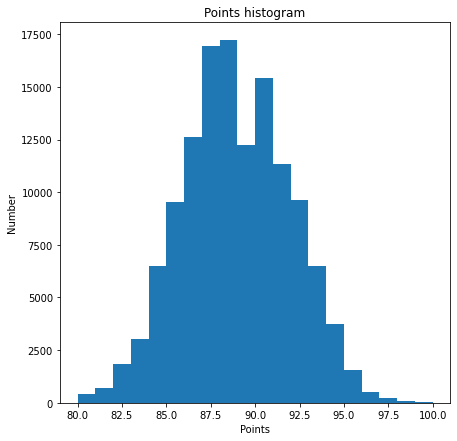

In [53]:
plt.figure(figsize=(7, 7))
plt.hist(wine_df.points, bins=20)
plt.title("Points histogram")
plt.xlabel("Points")
plt.ylabel("Number")
plt.show()

In [54]:
wine_df[LABEL] = (wine_df.points >= 90).astype(int)
wine_df = wine_df[[DESCRIPTION, LABEL]]

In [55]:
wine_df.head()

,description,label
0,"Aromas include tropical fruit, broom, brimston...",0
1,"This is ripe and fruity, a wine that is smooth...",0
2,"Tart and snappy, the flavors of lime flesh and...",0
3,"Pineapple rind, lemon pith and orange blossom ...",0
4,"Much like the regular bottling from 2012, this...",0


In [56]:
train, val, test = np.split(wine_df.sample(frac=1), [int(0.8*len(wine_df)), int(0.9*len(wine_df))])

In [57]:
print(f"Train length: {len(train)}\nTest length: {len(test)}\nValidation length: {len(val)}")

Train length: 103976
Test length: 12998
Validation length: 12997


In [58]:
def df_to_ds(dataframe, shuffle=True, batch_size=1024):
  df = dataframe.copy()
  labels = df.pop(LABEL)
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [59]:
train_data = df_to_ds(train)
test_data = df_to_ds(test)
val_data = df_to_ds(val)

<ipython-input-58-fcb074f26061>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df = {key: value[:, tf.newaxis] for key, value in dataframe.items()}


In [60]:
list(train_data)[0]

({'description': <tf.Tensor: shape=(1024, 1), dtype=string, numpy=
  array([[b"This elegant bottling by two service-industry veterans shows tons of potpourri, dried lavender, black raspberry and red plum on the nose. The flavors are quite broad and inviting, with hibiscus and ripe tomato meshing into juniper and clove. It's light in mouthfeel and weight, but well structured."],
         [b"This opens with inviting, classic Sangiovese aromas: woodland berry, forest floor, new leather, violet and truffle. The youthfully taut palate isn't quite as expressive\xe2\x80\x94yet\xe2\x80\x94but already offers Marasca cherry, white pepper and star anise notes. It's primary in its flavors now but will develop complexity over the next decade and then maintain well for years. Drink 2022\xe2\x80\x932032."],
         [b"Barbecue and lusty stews are what this wine wants. It's dryish to sweet in raisin, blackberry jam, chocolate, beef jerky and spice flavors, and the tannins are big and tough."],
      

## Embedding + model

In [61]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype=tf.string, trainable=True)

In [63]:
hub_layer(list(train_data)[0][0])

ValueError: ignored